In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/data_wl.yaml
/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/valid/labels.cache
/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/valid/labels/0389.txt
/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/valid/labels/0021.txt
/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/valid/labels/0845.txt
/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/valid/labels/1262.txt
/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/valid/labels/0696.txt
/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/valid/labels/0218.txt
/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/valid/labels/0817.txt
/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/valid/labels/0940.txt
/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/valid/label

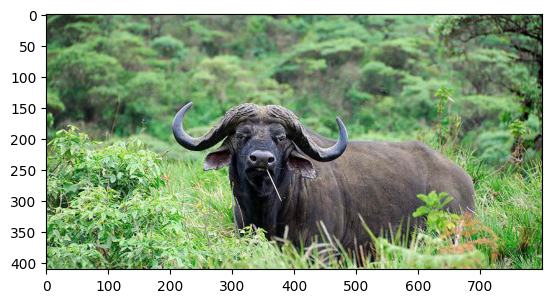

In [2]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/train/images/0001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
with open('/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/train/labels/0001.txt') as f:
    contents = f.read()
print(contents)

0 0.560000 0.663017 0.617500 0.644769


In [4]:
def read_yolo_labels(label_path):
    labels = []
    with open(label_path, "r") as f:
        for line in f.readlines():
            class_id, x_c, y_c, width, height = map(float, line.split())
            labels.append([class_id, x_c, y_c , width, height])
    return labels


In [5]:
read_yolo_labels('/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/train/labels/0001.txt')

[[0.0, 0.56, 0.663017, 0.6175, 0.644769]]

411, 800


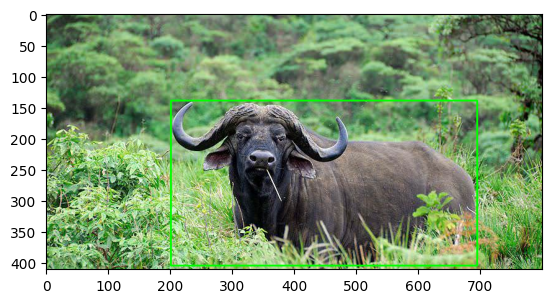

In [6]:
def draw_bounding_boxes(label_path, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    all_labels = read_yolo_labels(label_path)
    H, W, _ = img.shape 
    print(f'{H}, {W}')
    for label in all_labels:
        class_id, x_c, y_c, width, height = map(float, label)
        actual_xcenter = x_c*W
        actual_ycenter = y_c*H
        ltx = actual_xcenter - (width/2*W)
        lty = actual_ycenter - (height/2*H)
        rbx = actual_xcenter + (width/2*W)
        rby = actual_ycenter + (height/2*H)
        cv2.rectangle(img, (int(ltx), int(lty)), (int(rbx), int(rby)), (0, 255, 0), 2)
        plt.imshow(img)
        plt.show()
        

draw_bounding_boxes('/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/train/labels/0001.txt', '/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/train/images/0001.jpg')

In [7]:
classes = ['buffalo', 'elephant', 'rhino', 'zebra']

In [8]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [9]:
data_yaml = """
train: /kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/train/
val: /kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/valid/
nc: 4
names: ['buffalo', 'elephant', 'rhino', 'zebra']
"""

with open("/kaggle/working/wildlife.yaml", "w") as f:
    f.write(data_yaml)

In [10]:
!pip install ultralytics
from ultralytics import YOLO
model = YOLO('yolov8s.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
model.train(
    data ="/kaggle/working/wildlife.yaml",
    epochs = 5,
    imgsz=512,
    batch=32)

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/wildlife.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        150        262      0.922      0.937      0.969      0.809
               buffalo         38         60      0.982      0.912      0.968      0.814
              elephant         43         83      0.884       0.94      0.975      0.793
                 rhino         42         58      0.972      0.983      0.993      0.885
                 zebra         28         61      0.848      0.914      0.939      0.745
Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /kaggle/working/runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c274671f3d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0


image 1/1 /kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/train/images/0644.jpg: 352x512 2 elephants, 39.3ms
Speed: 1.4ms preprocess, 39.3ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 512)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'buffalo', 1: 'elephant', 2: 'rhino', 3: 'zebra'}
obb: None
orig_img: array([[[ 33,  34,  25],
        [ 28,  29,  20],
        [ 31,  32,  23],
        ...,
        [243, 229, 217],
        [243, 229, 217],
        [243, 229, 217]],

       [[ 36,  37,  28],
        [ 33,  34,  25],
        [ 37,  38,  29],
        ...,
        [243, 229, 217],
        [243, 229, 217],
        [243, 229, 217]],

       [[ 37,  39,  33],
        [ 37,  39,  33],
        [ 45,  45,  39],
        ...,
        [243, 229, 217],
        [243, 229, 217],
        [243, 229, 217]],

       ...,

       [[102, 156, 156],
        [113, 167, 16

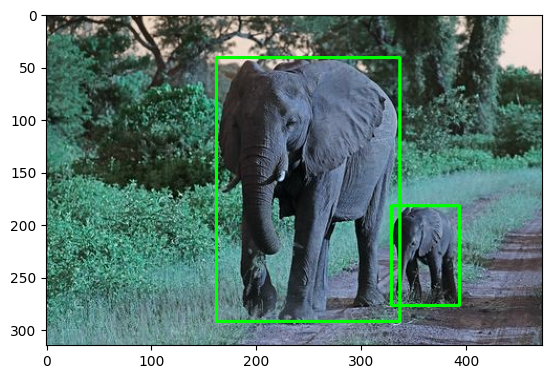

In [12]:
import cv2
import matplotlib.pyplot as plt
out = model.predict('/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/train/images/0644.jpg')
results = out[0]
names = ["buffalo", "elephant", "rhino", "zebra"]
print(results)
boxes = results.boxes.xyxy.cpu().numpy()
# Confidence scores
scores = results.boxes.conf.cpu().numpy()
# Class IDs
class_ids = results.boxes.cls.cpu().numpy()
animal_image = cv2.imread('/kaggle/input/object-detection-wildlife-dataset-yolo-format/final_data/train/images/0644.jpg')

for box, score, cls in zip(boxes, scores, class_ids):
    print(f"{names[int(cls)]}: {score:.2f}, box={box}")
    if score >= 0.6:
        x1, y1, x2, y2 = map(int, box)
        animal_image = cv2.rectangle(animal_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(animal_image)
plt.show()
    
        
        
        
    
